In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 200

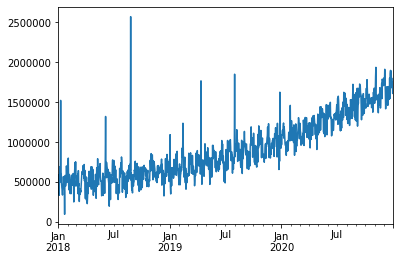

In [2]:
rand = np.random.RandomState(seed=20)

# 데이터 생성
idx = pd.date_range(start='2018-01-01', end='2020-12-31', freq='D')
x = np.arange(len(idx))
y = 500000 \
    + x ** 2 \
    + np.sin(x/4) * 100000 \
    + rand.randn(len(x)) * 100000 \
    + rand.gamma(0.01, 1000000, len(x))

# Series로 변환
ts = pd.Series(y, index=idx)
ts.plot()

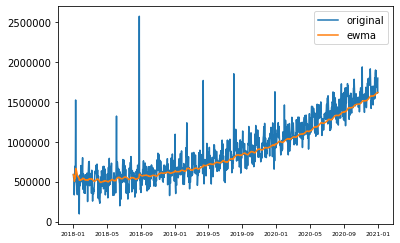

In [3]:
ewm_mean = ts.ewm(span=90).mean()  # 지수가중이동평균

fig, ax = plt.subplots()
ax.plot(ts, label='original')
ax.plot(ewm_mean, label='ewma')
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(6)  
ax.legend()

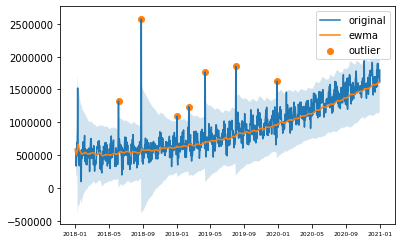

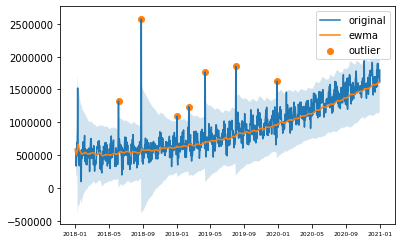

In [4]:
# 편차로 벗아난 값 감지
def plot_outlier(ts, ewm_span=90, threshold=3.0):
    assert type(ts) == pd.Series
    fig, ax = plt.subplots()

    ewm_mean = ts.ewm(span=ewm_span).mean()  # 지수가중이동평균
    ewm_std = ts.ewm(span=ewm_span).std()  # 지수가중이동표준편차
    ax.plot(ts, label='original')
    ax.plot(ewm_mean, label='ewma')

    # 표준편차로부터 3.0배 이상 떨어진 데이터를 이상데이터로써 표시
    ax.fill_between(ts.index,
                    ewm_mean - ewm_std * threshold,
                    ewm_mean + ewm_std * threshold,
                    alpha=0.2)
    outlier = ts[(ts - ewm_mean).abs() > ewm_std * threshold]
    ax.scatter(outlier.index, outlier, label='outlier')
    
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(6)     
    ax.legend()
    return fig

plot_outlier(ts)